ETNP_pyompa_for_WOD_USER_FRIENDLY_BASE_VERSION

Written by Natalya Evans

This script is built to perform an eOMP on the ETNP ODZ data from the WOD18 to determine variations in the stoichiometry of anaerobic remineralization. This stoichiometry can then be used to solve for the percent of nitrite re-oxidation. It was written during revisions for the paper "Prolific nitrite re-oxidation across the Eastern Tropical North Pacific Ocean" (https://www.essoar.org/doi/10.1002/essoar.10511252.1). 

This version of the code is significant because I designed it as a go-to template for performing water mass analysis with pyompa. It is designed to run in a google drive folder, where it reads in csv files from that same folder and writes a csv output to that folder. Other scripts for this project are designed to use Github, which allows them to access a repository and have superior version control. Unfortunately, this also adds Github familiarity as a potential barrier for new users. This code only requires setting up a google drive folder, which we anticipate may be more intuitive. 

For this code to run on a different computer in google colab, follow the steps below:

1. Replace te beginning of the URL that says "https://github.com/" with "https://colab.research.google.com/github/". This step should open the notebook in colab, if your google account has that set up. Some institutions don't have colab enabled, but a person gmail should.

2. Add a copy of this file to your google drive with the "Copy to Drive" button on top. Locate the folder where the copy was saved by going to "File" -> "Locate in Drive". It will likely be in the folder called "Colab Notebooks".

3. Put the csv files "WOD_ETNP_pyompa_2_reduced.csv" and "ETNP_pyompa_ref_values.csv" into this folder. These consist of the data to analyze and the endmembers, appropriately.

4. Adjust the working folder with the line that starts with "%cd ". This changes the directory. Everything after the entry "MyDrive" is a subfolder, so if this file is in the folder Colab Notebooks, then change this to say 
%cd "/content/drive/MyDrive/Colab Notebooks"

5. 



Comment this more and put on github

In [ ]:
# install pyompa to do the analysis and gsw for helpful interconversions
!pip install pyompa==0.4.2.0
!pip install gsw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Mount the google drive folder


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pwd # show working directory
%cd "/content/drive/MyDrive/importCSV"
!ls
#change path


/content/drive/MyDrive/Emma Senior Thesis/importCSV
 bogradTest.csv
 bogradTest.gsheet
 bogradWaterTypes.csv
 lawrenceAnalysis.csv
 lawrenceSI.csv
 lawrenceTest3.csv
 lawrenceTestAnalysis.csv
 lawrenceTest.csv
 lawrenceTest.gsheet
 modLawrenceSI.csv
 newFormattedDataOregonOrig.csv
'newOregonMoffettAdd(umol_kg).csv+oregonOrig(umol_kg).csv'
'newOregonMoffettAdd(umol_L).csv'
'newOregonMoffettAdd(umol_L).csv+oregonOrig(umol_L).csv'
'noSigFigsNewOregonMoffettAdd(umol_kg).csv+oregonOrig(umol_kg).csv'
'oldNewOregonMoffettAdd(umol_kg).csv+oregonOrig(umol_kg).csv'
'oregonOrig(umol_L).csv'
'Untitled spreadsheet.gsheet'


In [ ]:
import scipy.io
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data to analyze

In [ ]:
#change this
input_df = pd.read_csv("newOregonMoffettAdd(umol_kg).csv+oregonOrig(umol_kg).csv") # read in the data to be analyzed. This data file already has the values outside of the analysis region removed
data_df = input_df[(input_df['Longitude/(ºW)']>-125.5) & (input_df['Pot Density/kg m-3']>25.5)]
# data_df = data_df[(data_df['Longitude/(ºW)']>-126.5) & (data_df['Pot Density/kg m-3']>25.5)]


Define the endmembers. Column headers here have to match those of the data being analyzed

In [ ]:
#change this
endmembers_df_read = pd.read_csv("lawrenceTest3.csv")

In [ ]:
endmembers_df_read.head() # check it worked #make sure O2 is here

,Water mass,Temperature,Salinity (practical),Phosphate,Nitrate,Silicate,Oxygen/μmol kg-1
0,AABW0,0.07,34.87,2.26,32.46,128.23,216.23
1,AAIW0,5.04,34.39,1.67,23.99,11.51,272.31
2,AAIW1,4.47,34.40,1.99,28.54,20.43,231.45
3,ENPCW0,15.99,34.80,0.32,3.51,3.54,213.72
4,ENPCW1,8.55,34.20,1.57,21.55,28.66,177.51


Remove the endmembers we won't be using

In [ ]:
#pulls out which rows you use

#remove tCO2

#make sure O2 is here

# endmembers_df = endmembers_df_read.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]] # defines a new dataframe so we can cut and then adjust without re-reading in the data
endmembers_df = endmembers_df_read.iloc[[4,12,13,21,22,23,24,27]] # defines a new dataframe so we can cut and then adjust without re-reading in the data

# Lawrence ENPCW better than Bograd's, but still no ENPCW0.
# No NPIW0

# endmembers_df.head() # check that this selection is correct. When calling "head", only 5 rows will be displayed.
# endmembers_df['Water mass']
display(endmembers_df)

,Water mass,Temperature,Salinity (practical),Phosphate,Nitrate,Silicate,Oxygen/μmol kg-1
4,ENPCW1,8.550,34.20,1.570000,21.550000,28.660000,177.510000
12,NPIW1,7.150,34.02,1.190000,15.050000,25.260000,268.400000
13,NPIW2,4.540,34.12,2.520000,34.760000,77.910000,114.140000
21,uPSUW,7.750,32.80,1.131045,10.072153,14.440328,271.938378
22,dPSUW,6.680,33.69,1.704988,21.638737,33.174201,199.337490
23,13CW,13.410,34.85,1.987917,27.655428,21.496784,46.092380
24,NEPIW,9.470,34.68,2.658746,35.459681,38.683288,18.309310
27,TEST0,8.482,32.35,1.420000,14.890000,14.900000,205.000000


Text(0.5, 0, 'Phosphate (μmol/kg)')

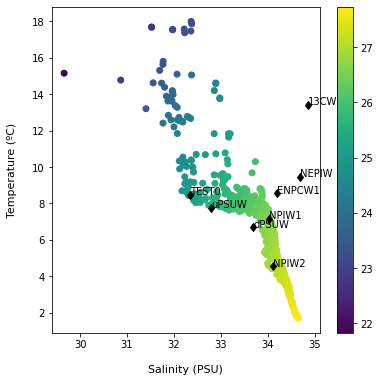

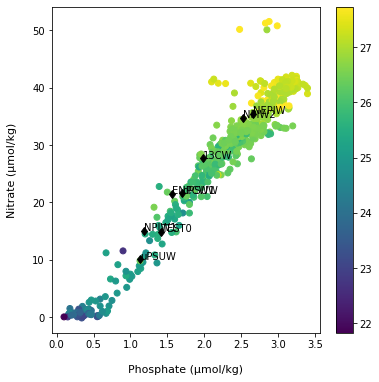

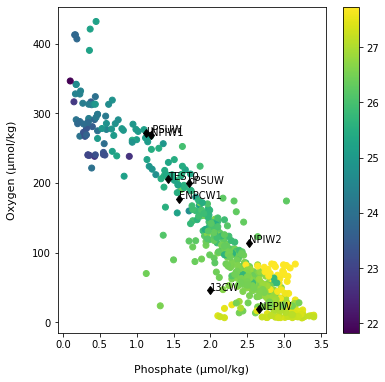

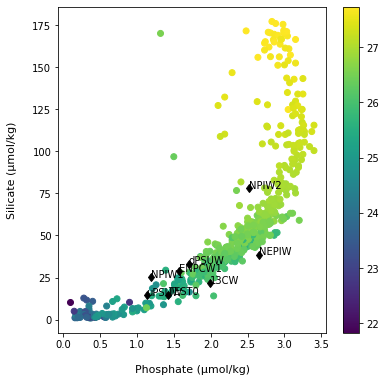

In [ ]:
#Temperature Salinity
fig = plt.figure(figsize=(6, 6))
xstring = "Salinity (practical)"
xstring2 = "Salinity (PSU)"
ystring = "Temperature"
ystring2 = "Temperature (ºC)"
plt.scatter(input_df[xstring], input_df[ystring], c=input_df["Pot Density/kg m-3"])
plt.colorbar()
plt.plot(endmembers_df[xstring], endmembers_df[ystring], "kd")
endmembers_df1 = endmembers_df.reset_index()
for i in range(len(endmembers_df1.index)):  
  plt.annotate(endmembers_df1['Water mass'][i], (endmembers_df1[xstring][i], endmembers_df1[ystring][i]))
  
plt.ylabel(ystring2, labelpad=15, fontsize=11)
plt.xlabel(xstring2, labelpad=15, fontsize=11)


#Density and Phosphate
fig = plt.figure(figsize=(6, 6))
xstring = "Phosphate"
xstring2 = "Phosphate (μmol/kg)"
ystring = "Nitrate"
ystring2 = "Nitrate (μmol/kg)"
plt.scatter(input_df[xstring], input_df[ystring], c=input_df["Pot Density/kg m-3"])
plt.colorbar()
plt.plot(endmembers_df[xstring], endmembers_df[ystring], "kd")
endmembers_df1 = endmembers_df.reset_index()
for i in range(len(endmembers_df1.index)):  
  plt.annotate(endmembers_df1['Water mass'][i], (endmembers_df1[xstring][i], endmembers_df1[ystring][i]))
  
plt.ylabel(ystring2, labelpad=15, fontsize=11)
plt.xlabel(xstring2, labelpad=15, fontsize=11)

#Phosphate and Oxygen
fig = plt.figure(figsize=(6, 6))
xstring = "Phosphate"
xstring2 = "Phosphate (μmol/kg)"
ystring = "Oxygen/μmol kg-1"
ystring2 = "Oxygen (μmol/kg)"
plt.scatter(input_df[xstring], input_df[ystring], c=input_df["Pot Density/kg m-3"])
plt.colorbar()
plt.plot(endmembers_df[xstring], endmembers_df[ystring], "kd")
endmembers_df1 = endmembers_df.reset_index()
for i in range(len(endmembers_df1.index)):  
  plt.annotate(endmembers_df1['Water mass'][i], (endmembers_df1[xstring][i], endmembers_df1[ystring][i]))
  
plt.ylabel(ystring2, labelpad=15, fontsize=11)
plt.xlabel(xstring2, labelpad=15, fontsize=11)

#Phosphate and Silicate
fig = plt.figure(figsize=(6, 6))
xstring = "Phosphate"
xstring2 = "Phosphate (μmol/kg)"
ystring = "Silicate"
ystring2 = "Silicate (μmol/kg)"
plt.scatter(input_df[xstring], input_df[ystring], c=input_df["Pot Density/kg m-3"])
plt.colorbar()
plt.plot(endmembers_df[xstring], endmembers_df[ystring], "kd")
endmembers_df1 = endmembers_df.reset_index()
for i in range(len(endmembers_df1.index)):  
  plt.annotate(endmembers_df1['Water mass'][i], (endmembers_df1[xstring][i], endmembers_df1[ystring][i]))
  
plt.ylabel(ystring2, labelpad=15, fontsize=11)
plt.xlabel(xstring2, labelpad=15, fontsize=11)

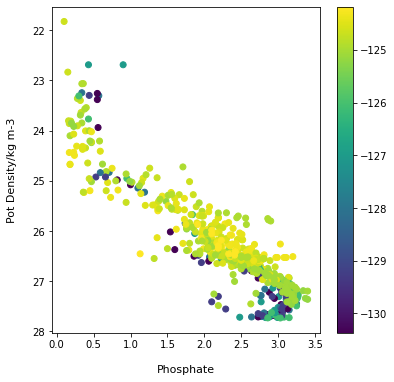

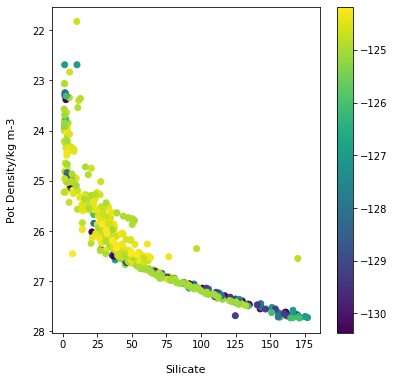

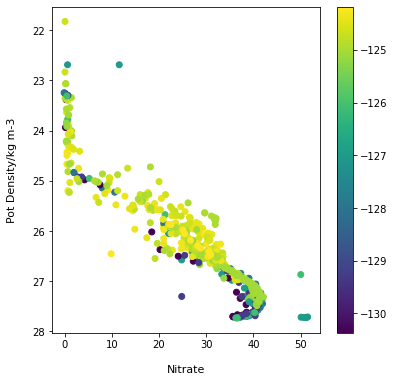

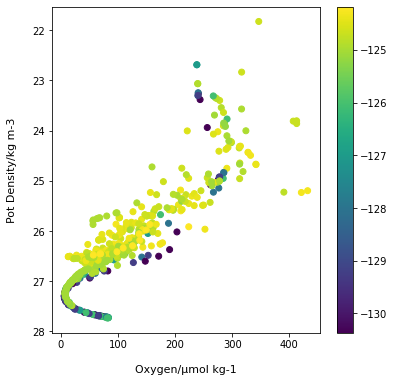

In [ ]:
#Pot Density vs Phosphate
fig = plt.figure(figsize=(6, 6))
xstring = "Phosphate"
ystring = "Pot Density/kg m-3"
plt.scatter(input_df[xstring], input_df[ystring], c=input_df["Longitude/(ºW)"])
plt.colorbar()
  
plt.ylabel(ystring, labelpad=15, fontsize=11)
plt.xlabel(xstring, labelpad=15, fontsize=11)
plt.gca().invert_yaxis()

#Pot Density vs Silicate
fig = plt.figure(figsize=(6, 6))
xstring = "Silicate"
plt.scatter(input_df[xstring], input_df[ystring], c=input_df["Longitude/(ºW)"])
plt.colorbar()
  
plt.ylabel(ystring, labelpad=15, fontsize=11)
plt.xlabel(xstring, labelpad=15, fontsize=11)
plt.gca().invert_yaxis()

#Pot Density vs Silicate
fig = plt.figure(figsize=(6, 6))
xstring = "Nitrate"
plt.scatter(input_df[xstring], input_df[ystring], c=input_df["Longitude/(ºW)"])
plt.colorbar()
  
plt.ylabel(ystring, labelpad=15, fontsize=11)
plt.xlabel(xstring, labelpad=15, fontsize=11)
plt.gca().invert_yaxis()

#Pot Density vs Silicate
fig = plt.figure(figsize=(6, 6))
xstring = "Oxygen/μmol kg-1"
plt.scatter(input_df[xstring], input_df[ystring], c=input_df["Longitude/(ºW)"])
plt.colorbar()
  
plt.ylabel(ystring, labelpad=15, fontsize=11)
plt.xlabel(xstring, labelpad=15, fontsize=11)
plt.gca().invert_yaxis()

Define the pyompa parameters and run the eOMP analysis